In [52]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [60]:
# Load Data from pickle file
myFile = open('Comparison_Opt_May_25_2.p', 'rb')
results = pkl.load(myFile)
myFile.close()

In [77]:
Evals = results["Evals"]
function_budget = 1e4 # results["function_budget"]

In [79]:
# average over trials
Averaged_Evals = np.mean(Evals, axis=2)
# Modify to assign nan to any entries = function_budget, as these
# correspond to problems that have not been solved
for i in range(Averaged_Evals.shape[0]):
    for j in range(Averaged_Evals.shape[1]):
        if Averaged_Evals[i,j] >= function_budget:
            Averaged_Evals[i,j] = np.nan
            
print(Averaged_Evals)

[[3.0000e+02 3.1800e+02 2.8200e+02 2.0700e+02 1.8400e+02        nan
         nan        nan 3.6200e+02        nan        nan 4.7500e+02
         nan 4.0520e+03        nan 1.8790e+03 2.0000e+00 4.7000e+01
         nan        nan        nan 5.3000e+01]
 [9.3370e+03 9.0710e+03 6.5460e+03 5.7530e+03 2.8060e+03        nan
         nan        nan        nan 7.4450e+03 6.7940e+03        nan
         nan        nan        nan        nan 2.0000e+00 9.9000e+01
  1.1500e+02        nan        nan 3.3400e+02]
 [4.7500e+02 5.7500e+02 5.8000e+02 3.6500e+02 4.7000e+02        nan
         nan        nan 5.8500e+02        nan        nan 6.9500e+02
         nan        nan        nan 4.0150e+03 1.0000e+01 1.2000e+02
         nan        nan        nan 2.0500e+02]
 [3.4885e+03 3.0160e+03 3.1960e+03 3.8710e+03 1.6885e+03        nan
         nan        nan 4.6810e+03        nan        nan 5.1535e+03
         nan        nan        nan        nan 1.0000e+00 7.2100e+02
         nan        nan        nan 4.9600e+

In [80]:
min_Evals = np.min(Averaged_Evals,axis=0)

In [81]:
normalized_Evals = Averaged_Evals/min_Evals
print(normalized_Evals)

[[ 1.          1.          1.          1.          1.                 nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan  2.          1.
          nan         nan         nan  1.        ]
 [31.12333333 28.52515723 23.21276596 27.79227053 15.25               nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan  2.          2.10638298
          nan         nan         nan  6.30188679]
 [ 1.58333333  1.8081761   2.05673759  1.76328502  2.55434783         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan 10.          2.55319149
          nan         nan         nan  3.86792453]
 [11.62833333  9.48427673 11.33333333 18.70048309  9.17663043         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan    

In [82]:
tau_vals = np.exp2(np.arange(0,12,0.01))
num_tau_vals = len(tau_vals)

In [83]:
NumProbs = normalized_Evals.shape[1]
rho_vals = np.zeros((4,num_tau_vals))

for j in range(num_tau_vals):
    for i in range(4):
        rho_vals[i,j] = np.count_nonzero(normalized_Evals[i,:]<=tau_vals[j])/NumProbs

print(rho_vals)

[[0.31818182 0.31818182 0.31818182 ... 0.36363636 0.36363636 0.36363636]
 [0.         0.         0.         ... 0.36363636 0.36363636 0.36363636]
 [0.         0.         0.         ... 0.36363636 0.36363636 0.36363636]
 [0.04545455 0.04545455 0.04545455 ... 0.36363636 0.36363636 0.36363636]]


In [84]:
print(NumProbs)

22


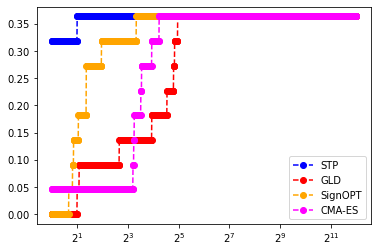

In [85]:
# Plotting

plt.semilogx(tau_vals, rho_vals[0,:], label="STP",
             color = 'blue', linestyle= '--', marker = 'o', base=2)
plt.semilogx(tau_vals, rho_vals[1,:], label="GLD",
             color = 'red', linestyle= '--', marker = 'o', base=2)
plt.semilogx(tau_vals, rho_vals[2,:], label="SignOPT",
             color = 'orange', linestyle= '--', marker = 'o', base=2)
plt.semilogx(tau_vals, rho_vals[3,:], label="CMA-ES",
             color = 'magenta', linestyle= '--', marker = 'o', base=2)
plt.legend()
# plt.show()
plt.savefig('PerformanceProfile_1e4.pdf')
